# **PROYECTO 1 BI - DETECCIÓN DE FAKE NEWS**
---

Integrantes equipo #11:
*   Estudiante #1: Juan Pablo Barón - 202210502
*   Estudiante #2: María José Amorocho - 202220179
*   Estudiante #3: Julian Mondragón - 202221122

---

# 0. Carga de datos

In [7]:
!pip install num2words
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install swifter
!pip install seaborn
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 11.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [2]:
from pandas import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re, string, unicodedata
from num2words import num2words
from nltk.corpus import stopwords
import spacy


# Punkt permite separar un texto en frases.
nltk.download('punkt')
#Descargar palabras vacías (stopwords)
nltk.download("stopwords")
stop_words = set(stopwords.words("spanish"))


data_set = pd.read_csv('./Data/fake_news_spanish.csv', delimiter=";")
data_set.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /home/juanp_baron11/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/juanp_baron11/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018


# **1. Entendimiento del negocio y enfoque analítico**

## 1.1. Generalidades

### Oportunidad/Problema de Negocio

La creacion de noticias falsas en el ámbito político representa un desafío significativo tanto a nivel nacional como internacional, impactando la gobernabilidad, la opinión pública y la seguridad global. La detección automática de noticias falsas se presenta como una oportunidad para mitigar estos efectos negativos, apoyando a medios de comunicación, instituciones gubernamentales y usuarios individuales a identificar contenido confiable.

### Objetivos

- Aplicar metodologías de analítica de textos para detectar noticias falsas.

- Construir un modelo analítico que clasifique las noticias en verídicas o falsas.

- Automatizar el proceso de detección para que funcione con nuevos conjuntos de datos de manera continua.

- Proporcionar a los usuarios finales herramientas para evaluar la veracidad de las noticias y reducir la desinformación.

### Criterios de Éxito

- Alta precisión, recall y F1 score en la detección de noticias falsas.

- Baja latencia en las predicciones.

- Ausencia de sesgos en el procesamiento de noticias.

- Capacidad de actualización periódica con nuevos datos.

- Impacto positivo en la reducción de desinformación y polarización.

### Organización y Roles Beneficiados

- Usuarios finales: Consumidores de contenido informativo, quienes podrán acceder a información verificada y confiable.

- Medios de comunicación: Organizaciones periodísticas que buscan mantener su credibilidad y combatir la desinformación.

- Instituciones gubernamentales: Apoyo en la toma de decisiones y gestión de la opinión pública.

- Empresas: Aquellas que trabajan en conjunto con el gobierno o dependen de información verídica para su operación.

## 1.2. Impacto y enfoque analítico

### Impacto en Colombia

La solución propuesta tiene el potencial de generar un impacto significativo en Colombia, contribuyendo a la disminución de la desinformación en el contexto político y social. Al proporcionar herramientas precisas para detectar noticias falsas, se espera fortalecer la confianza en las instituciones democráticas, reducir la polarización y apoyar a los medios de comunicación en la difusión de información verificada. Además, esta solución beneficiará a usuarios individuales, medios de comunicación y entidades gubernamentales, promoviendo un ecosistema informativo más confiable y transparente.

### Enfoque Analítico

El enfoque analítico adoptado para este proyecto incluye:

- Categoría del análisis: Se centra en un análisis predictivo, orientado a anticipar si una noticia es verdadera o falsa con base en los datos de entrenamiento proporcionados.

- Tipo de aprendizaje: Aprendizaje supervisado, utilizando un conjunto de datos etiquetado que permite al modelo aprender de ejemplos previos y realizar predicciones sobre nuevos datos.

- Tarea de aprendizaje: Clasificación, donde cada noticia se asigna a una de dos categorías: verídica o falsa.

- Técnicas y Algoritmos a Considerar: Para alcanzar los objetivos del negocio, se evaluarán diversas técnicas y algoritmos de aprendizaje automático y procesamiento de lenguaje natural (NLP), como Naive Bayes, Support Vector Machines (SVM), Random Forest, y métodos de vectorización como TF-IDF, Bag of Words y embeddings de palabras (Word2Vec, GloVe). Aún no se ha definido la técnica exacta de vectorización a utilizar, pero estas opciones serán analizadas y evaluadas según su rendimiento y adecuación al contexto del proyecto.



---

 # **2. Entendimiento y preparación de los datos**

### 2.1 Selección de variables

Para saber si una noticia es falsa o no, el modelo unicamente usará los datos de 'Titulo' y 'Descripcion' de la noticia. Pro una parte, la columna 'ID' dentro del dataset, no aporta ninguna información y por otro lado, la fecha de una noticia no es relevante para el caso dado que la verdacidad de la noticia no depende del día que haya sido escrita. Se dejará la columna de Label ya que a partir de esta es que el modelo puede aprender

In [18]:
def definir_variables(data_set_inicial):
    features = ['Titulo', 'Descripcion', 'Label']
    return data_set_inicial[features]
    
df = definir_variables(data_set)
df.head()

,Titulo,Descripcion,Label
0,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,1
1,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,0
2,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,1
3,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",1
4,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",0


### 2.2 Perfilamiento de datos

Número de datos

In [19]:
data_set.shape

(57063, 7)

Tipos de dato presentes, cantidad de datos nulos y columnas que componen el data set

In [20]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    57063 non-null  object
 1   Label                 57063 non-null  int64 
 2   Titulo                57047 non-null  object
 3   Descripcion           57063 non-null  object
 4   Fecha                 57063 non-null  object
 5   longitud_titulo       57063 non-null  int64 
 6   longitud_descripcion  57063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.0+ MB


Datos vacíos

In [21]:
df_null = pd.DataFrame(data_set.apply(lambda x: (x == "").sum()), columns=["Vacios"])
print(df_null)

                      Vacios
ID                         0
Label                      0
Titulo                     0
Descripcion                0
Fecha                      0
longitud_titulo            0
longitud_descripcion       0


Filas duplicadas

In [22]:
duplicated_rows = data_set.loc[data_set.duplicated(keep=False)]
duplicated_rows.shape

(875, 7)

Filas duplicadas parcialmente

In [23]:
def find_partial_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    """
    Identifica filas con el mismo título y descripción pero diferente label.
    
    Parámetros:
    df (pd.DataFrame): DataFrame de entrada con columnas ['id', 'label', 'Titulo', 'descripcion', 'fecha'].
    
    Retorna:
    pd.DataFrame: DataFrame con duplicados parciales.
    """
    # Identificar duplicados basados en 'Titulo' y 'descripcion'
    duplicated_mask = df.duplicated(subset=['Titulo', 'Descripcion'], keep=False)
    
    # Filtrar las filas que cumplen la condición
    duplicates = df[duplicated_mask].sort_values(by=['Titulo', 'Descripcion'])
    
    # Agrupar por título y descripción, asegurando que hay más de un label diferente
    duplicates_grouped = duplicates.groupby(['Titulo', 'Descripcion'])['Label'].nunique().reset_index()
    
    # Filtrar los casos donde hay más de un label único
    filtered_duplicates = duplicates_grouped[duplicates_grouped['Label'] > 1]

    # Unir con el DataFrame original para obtener los duplicados completos
    result = df.merge(filtered_duplicates[['Titulo', 'Descripcion']], on=['Titulo', 'Descripcion'])

    return result

df = find_partial_duplicates(data_set)
df.shape


(2, 7)

Análisis de balance de clases (que tanto hay de fake news label=0 y que tantas son veridicas label=1)

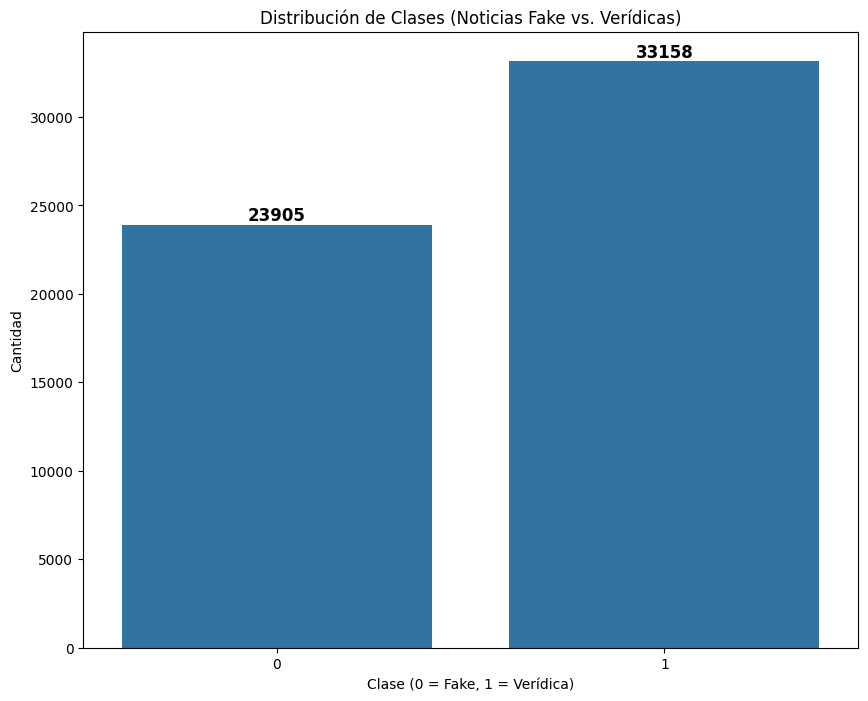

In [24]:
# Crear la figura
plt.figure(figsize=(10, 8))

# Crear el gráfico de conteo
ax = sns.countplot(x=data_set["Label"])

# Agregar etiquetas con el número de cada categoría en la parte superior de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Configurar título y etiquetas
plt.title("Distribución de Clases (Noticias Fake vs. Verídicas)")
plt.xlabel("Clase (0 = Fake, 1 = Verídica)")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()

En nuestro caso, la proporción es Fake: 23,905 (~41.9%) vs. Verídicas: 33,158 (~58.1%), lo cual no es un desbalance extremo.
Por lo que intentaremos primero entrenar el modelo sin aplicar over/undersampling y revisa las métricas de evaluación, si estas
indican un mal F1 score para alguna clase en especifico se revisara de nuevo esta parte para realizar alguna tecnica ya sea SMOTE, entre otras.

Comparación de longitud entre noticias Fake y Verídicas

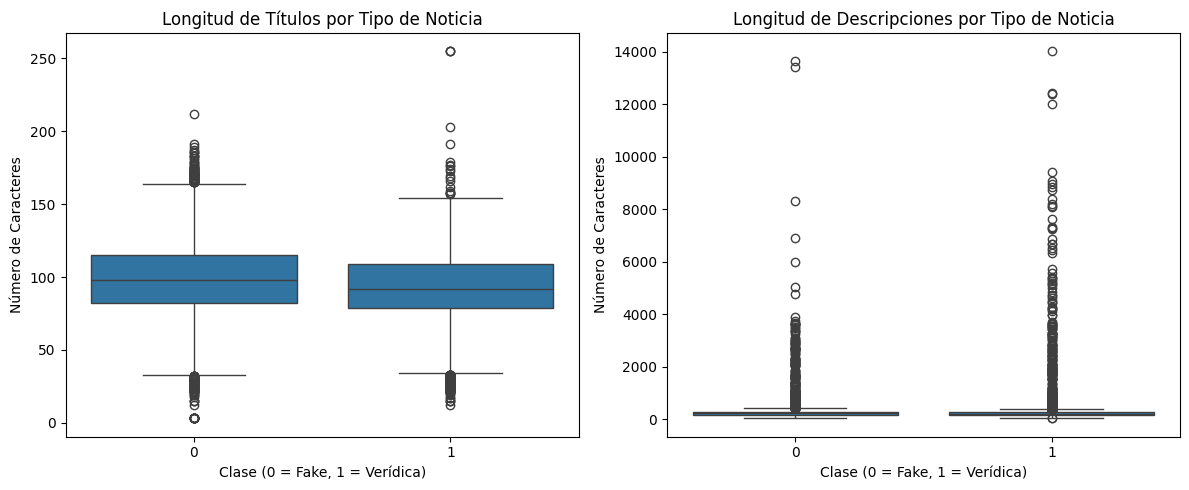

In [25]:
df = data_set

# Crear nuevas columnas con la longitud del texto en caracteres
df["longitud_titulo"] = df["Titulo"].astype(str).apply(len)
df["longitud_descripcion"] = df["Descripcion"].astype(str).apply(len)

# Graficar las distribuciones con boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df["Label"], y=df["longitud_titulo"], ax=axes[0])
axes[0].set_title("Longitud de Títulos por Tipo de Noticia")
axes[0].set_xlabel("Clase (0 = Fake, 1 = Verídica)")
axes[0].set_ylabel("Número de Caracteres")

sns.boxplot(x=df["Label"], y=df["longitud_descripcion"], ax=axes[1])
axes[1].set_title("Longitud de Descripciones por Tipo de Noticia")
axes[1].set_xlabel("Clase (0 = Fake, 1 = Verídica)")
axes[1].set_ylabel("Número de Caracteres")

plt.tight_layout()
plt.show()

Podemos ver que la longitud de titulos o descripciones no son un buen indicador ya que arrojan boxplots muy parecidos.

### 2.3 Preparación de datos

#### 2.3.1 Limpieza de datos

Eliminar filas duplicadas

In [26]:
def remove_duplicates(df: pd.DataFrame):
    """
    Elimina las filas duplicadas del dataSet.
    
    Parámetros:
    df (pd.DataFrame): DataFrame de entrada.
    
    Retorna:
    pd.DataFrame: DataFrame sin filas duplicadas.
    """
    return df.drop_duplicates().reset_index(drop=True)

df = remove_duplicates(data_set)
df.shape

(56618, 7)

Eliminar filas duplicadas parcialmente (noticias con un mismo titular y descripción, pero diferente label)

In [27]:
def eliminar_duplicados_parciales(df):
    """
    Elimina filas donde 'Titulo' y 'Descripcion' sean iguales, pero 'Label' sea diferente.
    
    Parámetros:
    df (pd.DataFrame): DataFrame con las columnas 'Titulo', 'Descripcion' y 'Label'.
    
    Retorna:
    pd.DataFrame: DataFrame sin los duplicados parciales.
    """
    # Contar cuántos valores únicos de Label existen por cada combinación de Titulo y Descripcion
    conteo_labels = df.groupby(['Titulo', 'Descripcion'])['Label'].nunique()
    
    # Identificar las combinaciones que tienen más de un Label distinto (es decir, duplicados parciales)
    duplicados_parciales = conteo_labels[conteo_labels > 1].index
    
    # Filtrar el DataFrame eliminando estas combinaciones
    df_filtrado = df[~df.set_index(['Titulo', 'Descripcion']).index.isin(duplicados_parciales)]
    
    return df_filtrado.reset_index(drop=True)

df = eliminar_duplicados_parciales(data_set)
df.shape


(57061, 7)

A continuación, se muestra un método para hacer la limpieza completa de los datos

In [28]:
def limpiar_data(data_set):
    df_variables = definir_variables(data_set)
    df_duplicados = remove_duplicates(df_variables)
    df_limpio = eliminar_duplicados_parciales(df_duplicados)
    return df_limpio

df = limpiar_data(data_set)
df.shape

(56612, 3)

#### 2.3.2 Eliminación de ruido

Funciones para dejar la información en texto plano (remover caracteres no ASCII, convertir las palabras en minúscula, remover la puntuación, reemplazar los números y remover stopwords)

In [29]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for w in words:
        new_w = w.lower()
        new_words.append(new_w)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(word, lang="es")
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words


#### 2.3.3 Tokenización, lematización y normalización

Para procesar los títulos de las noticias y su descripción se procede a ejecutar los siguietes pasos:
1. **Tokenización**: Dividir frases u oraciones en palabras con el fin de desglozar las palabras correctamente para el posterior análisis

2. **Lematización**: Cada palabra se reduce a su forma base o lema

3. **Normalización**: Se hace uso de la función de reducción de ruido para colocar cada palaba en minuscula, sin tildes, remover los signos de puntuación, caracteres no ASCII, reemplazar los números y las palabras vacías

In [30]:
import swifter

# Cargar modelo spaCy sin parser ni NER para mayor velocidad
nlp = spacy.load("es_core_news_sm", disable=["parser", "ner"])
stop_words = set(stopwords.words("spanish"))

def preprocessing2(words):
    words = [word.lower() for word in words]  # Convertir a minúsculas directamente
    words = [num2words(word, lang="es") if word.isdigit() else word for word in words]  # Reemplazar números
    words = [re.sub(r'[^\w\s]', '', word) for word in words if word]  # Eliminar puntuación
    words = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in words]  # Quitar caracteres no ASCII
    words = [word for word in words if word not in stop_words]  # Remover stopwords
    words = [word for word in words if word.strip() != ""] 
    return words

def procesar_texto(df, columnas):
    """
    Optimiza la tokenización, lematización y preprocesamiento de múltiples columnas de un DataFrame.
    """
    df = df.copy()
    df[columnas] = df[columnas].astype(str).fillna("")
    
    datos_procesados = {}
    
    for col in columnas:
        resultados = [
            ([token.text for token in doc if not token.is_space],  # Tokens
             [token.lemma_ for token in doc if not token.is_space])  # Lemas
            for doc in nlp.pipe(df[col], batch_size=100)  # Mayor batch_size para eficiencia
        ]
        
        # Separar tokens y lemas en listas
        df[f"{col}_tokens"], df[f"{col}_lemmas"] = zip(*resultados)
        
        # Aplicar procesamiento en paralelo
        datos_procesados[f"{col}_tokens_clean"] = df[f"{col}_tokens"].swifter.apply(preprocessing2)
    
    # Crear nuevo DataFrame solo con las columnas procesadas + label
    nuevo_df = pd.DataFrame(datos_procesados)
    nuevo_df.insert(0, "Label", df["Label"])  # Mantener la etiqueta
    
    return nuevo_df


In [35]:
def limpiar_y_procesar(data_set, columnas_texto):
    """
    Función que aplica limpieza de datos y tokenización en columnas de texto específicas.

    Parámetros:
    - data_set (DataFrame): Dataset original con las columnas a procesar.
    - columnas_texto (list): Lista de nombres de columnas que contienen texto a limpiar.

    Retorna:
    - DataFrame con los textos procesados.
    """
    # Aplicar limpieza de datos
    data_set_limpio = limpiar_data(data_set)
    print(" Data limpia")

    # Aplicar tokenización, lematización y normalización
    df_procesado = procesar_texto(data_set_limpio, columnas_texto)
    
    return df_procesado

# Uso de la función
df_procesado = limpiar_y_procesar(data_set, ["Titulo", "Descripcion"])
df_procesado.head(10)


 Data limpia


Pandas Apply: 100%|██████████| 56612/56612 [00:05<00:00, 9824.71it/s] 


,Label,Titulo_tokens_clean,Descripcion_tokens_clean
0,1,"[the, guardian, va, sanchez, europa, necesita,...","[diario, britanico, publico, pasado, jueves, e..."
1,0,"[revelan, gobierno, negocio, liberacion, mirel...","[revelan, gobierno, negocio, liberacion, mirel..."
2,1,"[ahora, nunca, joan, fuster, estatuto, valenci...","[valencianismo, convoca, castello, fiesta, gra..."
3,1,"[iglesias, alienta, yolanda, diaz, erc, eh, bi...","[politica, igual, negociar, empresarios, negoc..."
4,0,"[puigdemont, seria, ninguna, tragedia, repetic...","[entrevista, punt, avui, lider, jxcat, desdram..."
5,1,"[pnv, consolida, mayoria, pse, salva, papeles,...","[nacionalistas, consiguen, alcaldias, bilbao, ..."
6,0,"[exconsejero, nuria, marin, pide, indulto, cas...","[familiares, aluden, honestidad, integridad, p..."
7,1,"[fiscalia, pide, prision, incondicional, siete...","[suprime, delito, rebelion, imputo, inicialmen..."
8,1,"[jose, manuel, perez, tornero, creador, televi...","[futuro, presidente, rtve, licenciado, ciencia..."
9,0,"[ayusizacion, bng, santiago, abascal, instruye...","[pablo, santiago, abascal, planea, vivir, rent..."


In [ ]:
# Guardar dataset limpio en un CSV
df_procesado.to_csv("./Data/fake_news_cleaned.csv", index=False, encoding="utf-8")

#### 2.3.4 Vectorización

In [36]:
# Convertir listas de tokens a strings correctamente
df_procesado["Titulo_tokens_clean"] = df_procesado["Titulo_tokens_clean"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
df_procesado["Descripcion_tokens_clean"] = df_procesado["Descripcion_tokens_clean"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Revisar si ya están en formato string
print(df_procesado[["Titulo_tokens_clean", "Descripcion_tokens_clean"]].head())

                                 Titulo_tokens_clean  \
0  the guardian va sanchez europa necesita apuest...   
1  revelan gobierno negocio liberacion mireles ca...   
2  ahora nunca joan fuster estatuto valenciano cu...   
3  iglesias alienta yolanda diaz erc eh bildu neg...   
4  puigdemont seria ninguna tragedia repeticion e...   

                            Descripcion_tokens_clean  
0  diario britanico publico pasado jueves editori...  
1  revelan gobierno negocio liberacion mireles ca...  
2  valencianismo convoca castello fiesta grande c...  
3  politica igual negociar empresarios negociar g...  
4  entrevista punt avui lider jxcat desdramatizad...  


In [37]:
df_procesado.head()

,Label,Titulo_tokens_clean,Descripcion_tokens_clean
0,1,the guardian va sanchez europa necesita apuest...,diario britanico publico pasado jueves editori...
1,0,revelan gobierno negocio liberacion mireles ca...,revelan gobierno negocio liberacion mireles ca...
2,1,ahora nunca joan fuster estatuto valenciano cu...,valencianismo convoca castello fiesta grande c...
3,1,iglesias alienta yolanda diaz erc eh bildu neg...,politica igual negociar empresarios negociar g...
4,0,puigdemont seria ninguna tragedia repeticion e...,entrevista punt avui lider jxcat desdramatizad...


In [53]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=3000)
X_titulo = vectorizer.fit_transform(df_procesado["Titulo_tokens_clean"])
X_descripcion = vectorizer.fit_transform(df_procesado["Descripcion_tokens_clean"])

#  Concatenar ambas representaciones en una sola matriz
X = hstack([X_titulo, X_descripcion])

# Etiquetas
y = df_procesado["Label"]

# Verificar dimensiones de la matriz X y etiquetas y
print(f"Número de registros en X: {X.shape[0]}")
print(f"Número de etiquetas en y: {y.shape[0]}")

# Comprobar si hay inconsistencia
if X.shape[0] == y.shape[0]:
    print(" X y y tienen el mismo número de registros. OK.")
else:
    print(" Error: X y y tienen un número diferente de registros.")

Número de registros en X: 56612
Número de etiquetas en y: 56612
 X y y tienen el mismo número de registros. OK.


---

## **3. Modelado y evaluación**

### 3.1. Estudiante 1 (Juan Pablo Barón): Modelo 1

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

# Medir tiempo de ejecución
start_time = time.time()

# Transformador para vectorizar Título y Descripción SEPARADOS
tfidf_transformer = ColumnTransformer(
    transformers=[
        ('tfidf_titulo', TfidfVectorizer(ngram_range=(1,2), max_features=3000), "Titulo_tokens_clean"),
        ('tfidf_descripcion', TfidfVectorizer(ngram_range=(1,2), max_features=3000), "Descripcion_tokens_clean")
    ]
)

# Crear pipeline con TF-IDF separado y SVM
modelo_svm = Pipeline([
    ('vectorizacion', tfidf_transformer),
    #('clasificador', SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced'))
    ('clasificador', LinearSVC(C=1, random_state=42, dual=False))  
])

# Definir K-Folds estratificado (5 folds)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Evaluación con Cross-Validation usando múltiples núcleos
print(" Ejecutando Cross-Validation con SVM usando TÍTULO y DESCRIPCIÓN separados...")

# **Aquí pasamos el DataFrame original con texto** y el pipeline vectoriza internamente
y_pred_cv = cross_val_predict(modelo_svm, df_procesado, df_procesado["Label"], cv=kf, n_jobs=-1, verbose=1)

# Calcular métricas
accuracy = accuracy_score(df_procesado["Label"], y_pred_cv)
precision = precision_score(df_procesado["Label"], y_pred_cv, average='binary')
recall = recall_score(df_procesado["Label"], y_pred_cv, average='binary')
f1 = f1_score(df_procesado["Label"], y_pred_cv, average='binary')
conf_matrix = confusion_matrix(df_procesado["Label"], y_pred_cv)

# Mostrar resultados
print("\n Resultados de Cross-Validation con SVM (Título y Descripción separados):")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1-Score: {f1:.4f}")
print("\n Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
print("\n Reporte de Clasificación:")
print(classification_report(df_procesado["Label"], y_pred_cv))

# Medir tiempo total
end_time = time.time()
print(f"\n Tiempo total de ejecución: {(end_time - start_time) / 60:.2f} minutos")


 Ejecutando Cross-Validation con SVM usando TÍTULO y DESCRIPCIÓN separados...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.6s remaining:   22.0s



 Resultados de Cross-Validation con SVM (Título y Descripción separados):
 Accuracy: 0.9022
 Precision: 0.8950
 Recall: 0.9414
 F1-Score: 0.9176

 Matriz de Confusión:
[[20260  3615]
 [ 1919 30818]]

 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     23875
           1       0.90      0.94      0.92     32737

    accuracy                           0.90     56612
   macro avg       0.90      0.89      0.90     56612
weighted avg       0.90      0.90      0.90     56612


 Tiempo total de ejecución: 0.27 minutos


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.0s finished


### 3.2. Estudiante 2 (María José Amorocho): Modelo 2

### 3.3. Estudiante 3 (Julian Mondragón): Modelo 3

## **4. Resultados**

### 4.1. Descripción de resultados obtenidos y cómo aportan a lograr el objetivo del modelo planteado

### 4.2. Estrategia

### 4.3 Archivo de predicciones sobre los datos de prueba en formato CSV